<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH-ZRA/blob/main/Ordinale_Muster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import sys, os
# Lade 
if "google.colab" in sys.modules:
    if os.getcwd() == "/content":
        !git clone "https://github.com/ollihansen90/Mathe-SH-ZRA.git"
        os.chdir("Mathe-SH-ZRA")

from utils import conv1d, get_data, plot
import numpy as np
import matplotlib.pyplot as plt

def binafy(array):
    facs = (2**np.arange(len(array))[::-1])[:,None]
    return np.sum(array*facs, axis=0)

def get_histogramm(array):
    histogramm = np.zeros(32)
    for v in array:
        histogramm[v] += 1
    return histogramm

def entropy(histogramm):
    N = np.sum(histogramm)
    histogramm_N = histogramm/N
    h = -np.sum(histogramm_N*np.log(histogramm_N+1e-10))
    return h, np.log(N)

data = get_data()

(2, 494)
(3, 494)
(4, 494)
(5, 494)


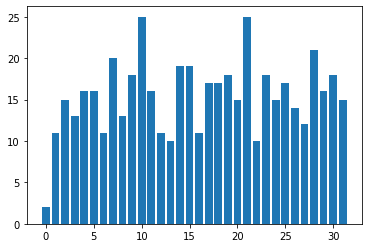

(3.4178974968825084, 6.202535517187923)


In [65]:
def ordinalify(data, k_size=5):
    diffdata = data[1:]-data[:-1]
    ordinals = 1*(diffdata>0)
    k_size = 5

    ordinallist = ordinals[:-k_size][None]
    for k in range(1, k_size):
        ordinallist = np.concatenate((ordinallist, ordinals[k:-k_size+k][None]), axis=0)
        print(ordinallist.shape)
    return ordinallist
k_size = 5
histogramm = get_histogramm(binafy(ordinalify(data, k_size=k_size)))
plt.figure()
plt.bar(list(range(2**k_size)), histogramm)
plt.show()
print(entropy(histogramm))

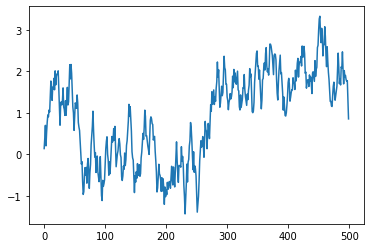

(2, 494)
(3, 494)
(4, 494)
(5, 494)


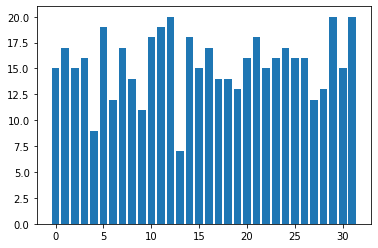

(3.445000789739793, 6.202535517187923)


In [66]:
brown_movement = np.cumsum((np.random.rand(500))-0.5)
plt.figure()
plt.plot(brown_movement)
plt.show()

k_size = 5
histogramm = get_histogramm(binafy(ordinalify(brown_movement, k_size=k_size)))
plt.figure()
plt.bar(list(range(2**k_size)), histogramm)
plt.show()
print(entropy(histogramm))

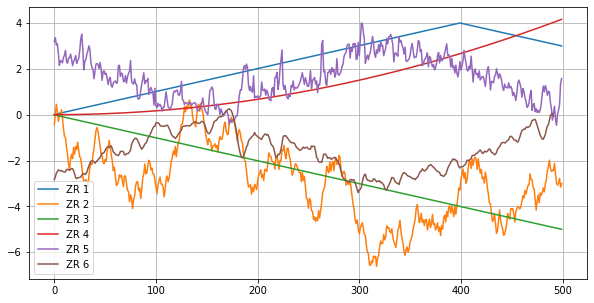

(2, 494)
(3, 494)
(4, 494)
(5, 494)


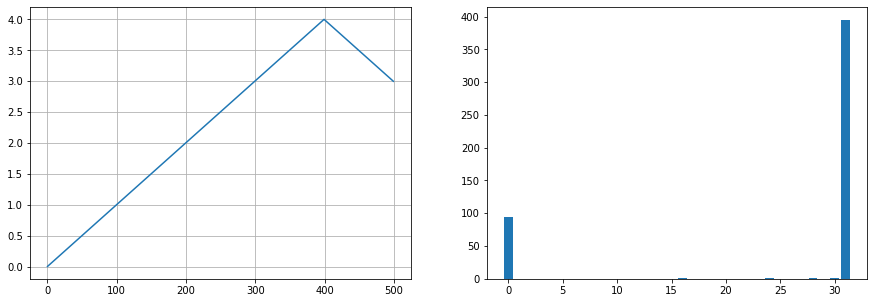

(0.5461019501142493, 6.202535517187923)
(2, 494)
(3, 494)
(4, 494)
(5, 494)


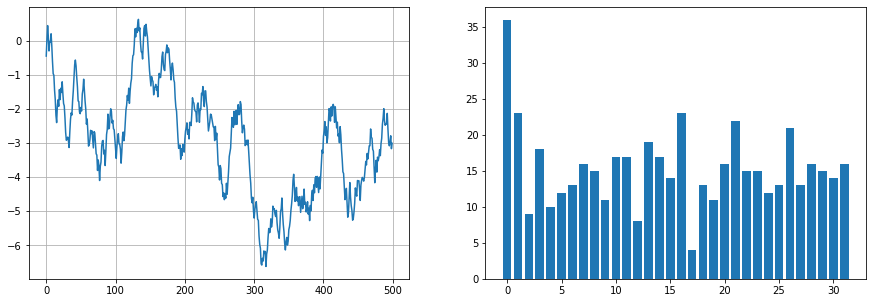

(3.404529576167148, 6.202535517187923)
(2, 494)
(3, 494)
(4, 494)
(5, 494)


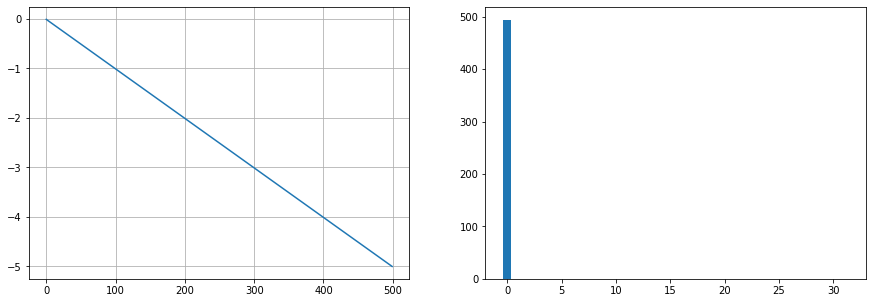

(-1.000000082690371e-10, 6.202535517187923)
(2, 494)
(3, 494)
(4, 494)
(5, 494)


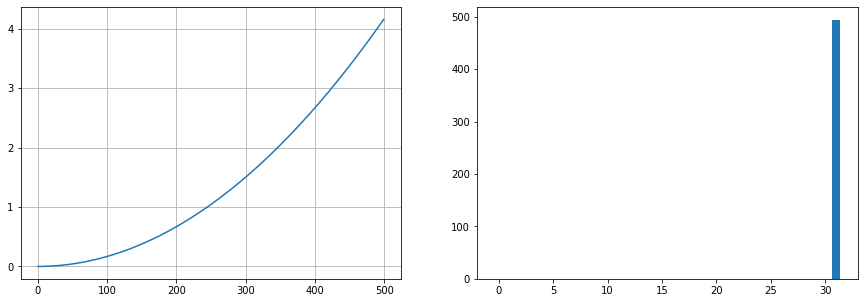

(-1.000000082690371e-10, 6.202535517187923)
(2, 494)
(3, 494)
(4, 494)
(5, 494)


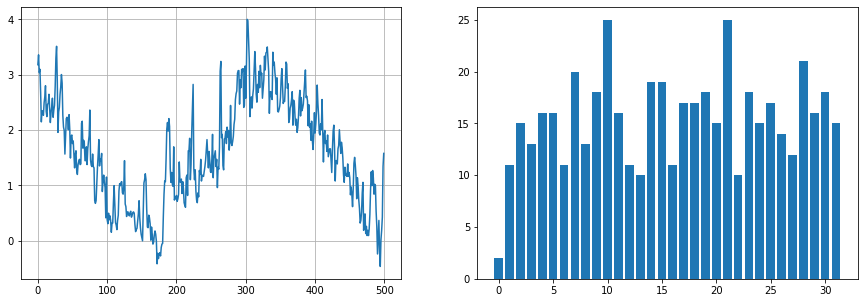

(3.4178974968825084, 6.202535517187923)
(2, 486)
(3, 486)
(4, 486)
(5, 486)


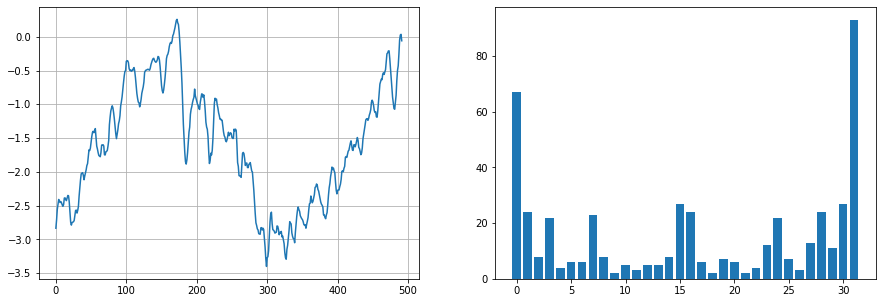

(2.947859698868167, 6.186208623900494)


In [91]:
zeitreihe1 = np.cumsum(np.array(400*[1]+100*[-1]))/100
zeitreihe2 = np.cumsum((np.random.rand(500))-0.5)
zeitreihe3 = -np.cumsum(np.ones(500))/100
zeitreihe4 = np.cumsum(np.arange(500))/30000
zeitreihe5 = get_data()
zeitreihe5 = zeitreihe5/np.max(np.abs(zeitreihe5))*4
zeitreihe6 = -conv1d(zeitreihe5, np.array(7*[1/7]))
plt.figure(figsize=[10,5])
plt.plot(zeitreihe1)
plt.plot(zeitreihe2)
plt.plot(zeitreihe3)
plt.plot(zeitreihe4)
plt.plot(zeitreihe5)
plt.plot(zeitreihe6)
plt.grid()
plt.legend([f"ZR {i+1}" for i in range(6)])
plt.savefig("Zeitreihenvergleich.png")
plt.show()

k_size = 5

for i,zr in enumerate([zeitreihe1, zeitreihe2, zeitreihe3, zeitreihe4, zeitreihe5, zeitreihe6]):
    histogramm = get_histogramm(binafy(ordinalify(zr, k_size=k_size)))
    plt.figure(figsize=[15, 5])
    plt.subplot(1,2,1)
    plt.plot(zr)
    plt.grid()
    plt.subplot(1,2,2)
    plt.bar(list(range(2**k_size)), histogramm)
    plt.savefig(f"hist ZR{i+1}.png")
    plt.show()
    print(entropy(histogramm))
